In [82]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import make_blobs

In [83]:
import matplotlib.pyplot as plt

In [84]:
X,y=make_blobs(n_features=5,centers=2,random_state=42)

In [85]:
X.shape

(100, 5)

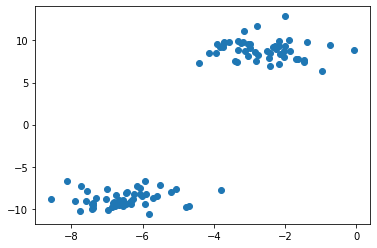

In [86]:
plt.scatter(X[:,0],X[:,1])

In [87]:
model=PCA(n_components=3)

In [88]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [89]:
model.components_

array([[ 0.18493745,  0.83560971, -0.1174048 , -0.00551843, -0.50372633],
       [ 0.39405238,  0.05192084, -0.4117182 ,  0.75570099,  0.31848248],
       [-0.22154892,  0.5429321 ,  0.22198471, -0.12489785,  0.76893701]])

In [90]:
model.components_.shape

(3, 5)

In [91]:
x_mod=np.dot(X,(model.components_).T)

In [92]:
x_mod.shape

(100, 3)

In [93]:
x_rev=np.dot(x_mod,model.components_)

In [94]:
x_rev.shape

(100, 5)

In [95]:
x_mod1=np.dot(X,(model.components_[:1]).T)

In [96]:
x_mod1.shape

(100, 1)

(array([39., 11.,  0.,  0.,  0.,  0.,  0.,  0., 34., 16.]),
 array([-13.32118172, -10.71516547,  -8.10914923,  -5.50313298,
         -2.89711673,  -0.29110048,   2.31491576,   4.92093201,
          7.52694826,  10.1329645 ,  12.73898075]),
 <a list of 10 Patch objects>)

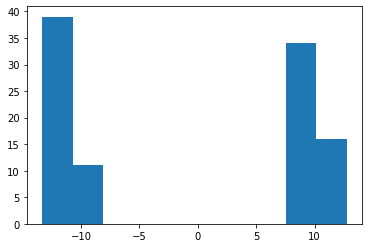

In [97]:
plt.hist(x_mod1)

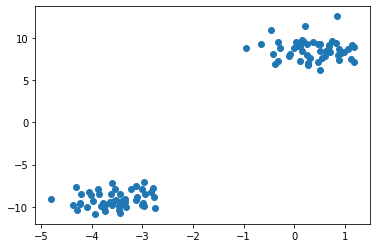

In [98]:
plt.figure()
plt.scatter(x_rev[:,0],x_rev[:,1])

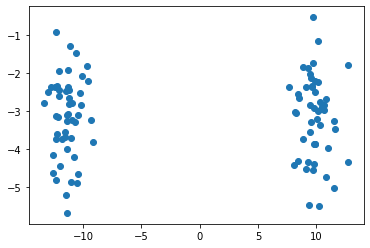

In [99]:
plt.figure()
plt.scatter(x_mod[:,0],x_mod[:,1])

In [100]:
data=np.load("../../thirtyfive/datasets/mnist/mnist_train_small.npy")

In [101]:
data.shape

(19999, 785)

In [102]:
X,y=data[:,1:],data[:,0]

In [103]:
X.shape

(19999, 784)

In [104]:
model=PCA(n_components=100)

In [105]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [106]:
model.components_.shape

(100, 784)

In [107]:
x_mod=np.dot(X,(model.components_).T)

In [108]:
x_mod.shape

(19999, 100)

In [109]:
x_rev=np.dot(x_mod,model.components_)

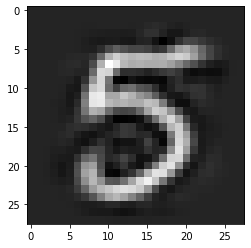

In [110]:
plt.imshow(x_rev[0].reshape(28,28),cmap="gray")

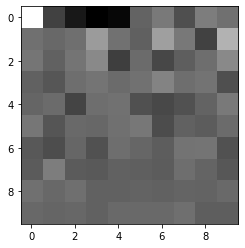

In [111]:
plt.imshow(x_mod[0].reshape(10,10),cmap="gray")

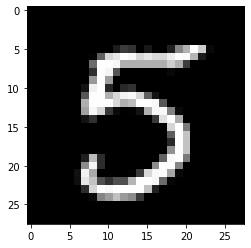

In [112]:
plt.imshow(X[0].reshape(28,28),cmap="gray")

In [113]:
model=PCA(n_components=2)

In [114]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [115]:
model.components_.shape

(2, 784)

In [116]:
x_mod=np.dot(X,(model.components_).T)

In [130]:
x_mod.shape

(19999, 2)

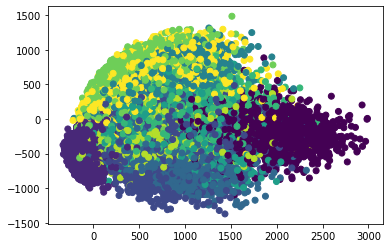

In [118]:
plt.scatter(x_mod[:,0],x_mod[:,1],c=y)

In [119]:
index=y<3

In [120]:
x_sel=x_mod[index]
y_sel=y[index]

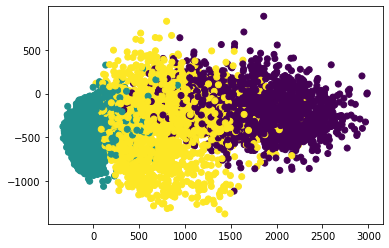

In [121]:
plt.scatter(x_sel[:,0],x_sel[:,1],c=y_sel)

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [124]:
model=KNeighborsClassifier()

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
...     x_sel, y_sel, test_size=0.33, random_state=42)

In [127]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [128]:
model.score(X_test,y_test)

0.8518337408312958